# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

## He tomado los datos de processed.cleveland.data

In [483]:
DATASET_PATH = "./data/"

In [484]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [485]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [486]:
my_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


In [487]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [488]:
my_data[target].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [489]:
y = my_data[target].values

In [490]:
sano_mask = y == 0
enfermo_mask = y > 0

In [491]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [492]:
my_data.num=y_class

In [493]:
my_data2 = my_data.drop(my_data[my_data.ca=="?"].index)
my_data2 = my_data2.drop(my_data2[my_data2.thal=="?"].index)
y = my_data2.num


In [494]:
my_data2 = my_data2.drop("num", axis=1)

In [495]:
my_data2[["cp", "restecg", "slope", "ca", "thal"]]=my_data2[["cp", "restecg", "slope", "ca", "thal"]].astype(str)
my_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    object 
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    object 
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    object 
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
dtypes: float64(8), object(5)
memory usage: 32.4+ KB


In [496]:
X = pd.get_dummies(my_data2)

X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0,0,...,0,1,0,1,0,0,0,0,0,1
297,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,1,0,...,0,1,0,1,0,0,0,0,0,1
298,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,0,0,...,0,1,0,0,0,1,0,0,0,1
299,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados.

In [497]:
from tabulate import tabulate
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [498]:
def calc_pra(true, pred):

    # Calculamos TP, TN, FP, FN
    TP = np.sum((true == 1) & (pred == 1))
    TN = np.sum((true == 0) & (pred == 0))
    FP = np.sum((true == 0) & (pred == 1))
    FN = np.sum((true == 1) & (pred == 0))

    # Calculamos Precision, Recall y Accuracy
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    puntaje = precision+recall+accuracy

    print(f"El total de datos comparados es: {true.size}\n")

    print(f"La metrica Precision es: {precision:.2f}")
    print(f"La metrica Recall es: {recall:.2f}")
    print(f"La metrica Accuracy es: {accuracy:.2f}")

    result = [precision.round(4), recall.round(4),accuracy.round(4),puntaje.round(4)]

    return result



#Usando Logistic Regression

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lrcv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
y_hat = lrcv.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [500]:
lrcv.score(X_train, y_train)

0.8985507246376812

In [501]:
lrcv.score(X_test, y_test)

0.8314606741573034

In [502]:
## Obtenemos los diagnosticos y_hat y los comparamos con la set de test y_test

lr_result = calc_pra(y_test, y_hat)

El total de datos comparados es: 89

La metrica Precision es: 0.82
La metrica Recall es: 0.76
La metrica Accuracy es: 0.83


In [503]:
## Calculando las probabilidades de las ocurrencias se puede mejorar las metricas pero hay que notar que se descartaria 1/3 aproximadamente de los diagnosticos

proba = lrcv.predict_proba(X_test)
dif_cases = abs(proba[:,0]-proba[:,1])

y_hat_desc = y_hat[dif_cases>0.4]
y_test_desc = y_test[dif_cases>0.4]

lr_descarte = calc_pra(y_test_desc, y_hat_desc)

El total de datos comparados es: 76

La metrica Precision es: 0.82
La metrica Recall es: 0.80
La metrica Accuracy es: 0.83


**Usando PCA sobre X para la reduccion de dimensiones**

In [504]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
np.sum(pca.explained_variance_ratio_)

0.9991949476743844

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

lrcv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
y_hat = lrcv.predict(X_test)

In [506]:
lr_pca_result = calc_pra(y_test, y_hat)

El total de datos comparados es: 89

La metrica Precision es: 0.90
La metrica Recall es: 0.67
La metrica Accuracy es: 0.81


**Con PCA se reduce considerablemente la dimensionalidad de X por lo tanto el coste del procesamiento pero a coste de las metricas**

#Usando LDA

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lda = LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [508]:
y_hat = lda.predict(X_test)

In [509]:
lda_result = calc_pra(y_test, y_hat)

El total de datos comparados es: 89

La metrica Precision es: 0.90
La metrica Recall es: 0.80
La metrica Accuracy es: 0.85


#Usando QDA

In [510]:
qda = QDA()
qda.fit(X_train,y_train)
y_hat = qda.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [511]:
qda_result = calc_pra(y_test, y_hat)

El total de datos comparados es: 89

La metrica Precision es: 0.73
La metrica Recall es: 0.78
La metrica Accuracy es: 0.74


#Conclusiones



In [517]:
results = pd.DataFrame(
    {
        "Logistic Regression": lr_result,
        "Logistic Regression (descartando datos)": lr_descarte,
        "Logistic Regression (PCA)": lr_pca_result,
        "LDA": lda_result,
        "QDA": qda_result,
    },
    index=["Precision","Recall","Accuracy","Puntaje"],)

In [519]:
print(tabulate((results),headers=("keys"), tablefmt='pretty'))

+-----------+---------------------+-----------------------------------------+---------------------------+--------+--------+
|           | Logistic Regression | Logistic Regression (descartando datos) | Logistic Regression (PCA) |  LDA   |  QDA   |
+-----------+---------------------+-----------------------------------------+---------------------------+--------+--------+
| Precision |       0.8235        |                 0.8235                  |          0.9032           |  0.9   | 0.7292 |
|  Recall   |       0.7568        |                   0.8                   |          0.6667           |  0.8   | 0.7778 |
| Accuracy  |       0.8315        |                 0.8289                  |           0.809           | 0.8539 | 0.7416 |
|  Puntaje  |       2.4117        |                 2.4525                  |          2.3789           | 2.5539 | 2.2485 |
+-----------+---------------------+-----------------------------------------+---------------------------+--------+--------+


**Agregue una celda de "Puntaje" que suma las metricas suponiendo que tienen la misma importancia (ponderacion), esta claro que no tiene porque ser asi ya que puede ser mas relevante una metrica que otra tomando en cuenta los factores TP, TN, FP y FN, para el caso de la medicina dar un falso negativo puede ser algo mas grave que dar un falso positivo.**

**Se puede observar los diferentes modelos en donde con los datos tomados el modelo de LDA sale con un mayor puntaje, sin embargo el QDA sale mas desfavorecido.**

**Dejare adjunta la imagen con la que emiti esta conclusion, ya que a diferentes corridas las metricas pueden cambiar.**

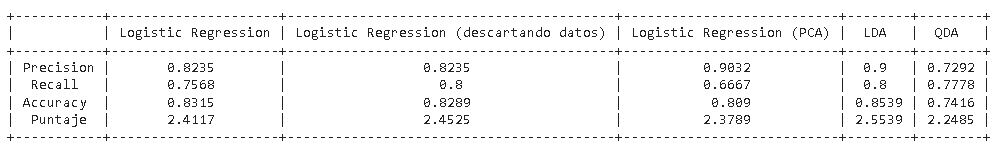